# Running Python in Notebooks

---

Jupyter (previously known as IPython) is a dynamic interaction platform that works with the shell and your browser so that you may code and visualize the results in one environment. The closest analog is an RMarkdown document. An important advantage is that you can step by step build your results and analysis, write your text, and visualize the graphs and results without having to constantly re-render the entire document to see updates. This strength is also a weakness as you may inadvertently introduce errors, load data, or create variables in the wrong order, causing errors when trying to replicate.

---


## Basics of Jupyter (IPython) Notebooks

To start up a Jupyter notebook server, simply navigate to the directory where you want the notebooks to be saved and run the command. 

```Bash
jupyter notebook
```

A browser should open with a notebook navigator. From here, you can either click to open an existing notebook or click the "New" button and select "Python 3". You may rename any notebook by clicking its title at the top of the page.

Notebooks are sequences of cells. Cells can be markdown, code, or raw text. You can run Markdown or code in cells, similar to RMarkdown.

---

## Calling the Command Line from Jupyter

#### Note: you can call the command line from jupyter by using a "!" before the command.

#### *For example, you could use this option to commit your work on Git* 

In [2]:
!git status

On branch master
Your branch is up-to-date with 'origin/master'.
Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   Working_with_Data_In_Python.ipynb
	deleted:    using_python.Rmd

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	Gentle_Introduction_from_R_to_Python.Rmd

no changes added to commit (use "git add" and/or "git commit -a")


---

# Getting the Data

## Today, we will be using data from the [NOAA National Climatic Data Center](https://www.ncdc.noaa.gov/oa/climate/ghcn-daily/)

Further documentation on this data is available here: [http://doi.org/10.7289/V5D21VHZ]( http://doi.org/10.7289/V5D21VHZ). A readme file and [codebook for the data](http://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) is also available.

We will download the daily data, as well as data on the ghcnd stations using [curl](https://curl.haxx.se/docs/manpage.html).

In [143]:
#Download the Data Using Curl
!curl -O http://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/2016.csv.gz
!gunzip 2016.csv.gz
!curl -O http://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt

/Users/Joshua/Box Sync/2016F/MACS30500/lab/Gentle_R_to_Python
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  146M  100  146M    0     0  5622k      0  0:00:26  0:00:26 --:--:-- 6802k
2016.csv
Getting Started Working with Data In Python.ipynb
LICENSE
Untitled.ipynb
Working_with_Data_In_Python.ipynb
fizzbuzzboom.R
fizzbuzzboom.py
ghcnd-stations.txt
intro-to-modeling-in-python.ipynb
maxKlein2016.csv
using_python.Rmd
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 8461k  100 8461k    0     0  1796k      0  0:00:04  0:00:04 --:--:-- 1879k
2016.csv
Getting Started Working with Data In Python.ipynb
LICENSE
Untitled.ipynb
Working_with_Data_In_Python.ipynb
fizzbuzzboom.R
fizzbuzzboom.py
ghcnd-stations.txt
intro-to-modeling-in-python.ipynb
maxKlein2016.csv
using_python.

---

# Exploratory Data Analysis with Pandas

[Pandas](http://pandas.pydata.org/) is a libary created by [Wes McKinney](http://blog.wesmckinney.com/) that introduces the R-like dataframe object to Python and makes working with data in Python a lot easier. It's also a lot more efficient than the R dataframe and pretty much makes Python superior to R in every imaginable way (except for ggplot 2). 

We start by importing the libraries we're going to use: `pandas` and `matplotlib`.

For R users, importing a package is equilavlent to `library(package_name)`.

Note that packages are often loaded in Python using an alias, as shown below. In this way, when we later call a pandas function, we can refer to it as `pd.function_name` instead of `pandas.function_name`.


In [199]:
# Import Statements
import pandas as pd
import numpy as np

#Turn of Notebook Package Warnings
import warnings
warnings.filterwarnings('ignore')

In Jupyter notebooks, some utilities can be imported with [magic statements](https://ipython.org/ipython-doc/3/interactive/magics.html) indicated by a `%`, not to be confused with the python operator `%`. Magic commands only apply to the Jupyter notebook and begin a line.

In [ ]:
%matplotlib inline

We will also set the file location used. If you cloned the repository and ran the steps sequentially, then the relative directory location should be correct.

In [144]:
# File Locations
# Change these on your machine (if needed)
datadir = ""
weather_data_raw = datadir + "2016.csv"
station_data_raw = datadir + "ghcnd-stations.txt"

## Loading Data into a Pandas DataFrame

So far we've been working with raw text files. That's one way to store and interact with data, but there are only a limited set of functions that can take as input raw text. Python has an amazing array of of data structures to work with that give you a lot of extra power in working with data. 

Build in Data Structures
- strings ""
- lists []
- tuples ()
- sets {}
- dictionaries {'key':value}

Additional Essential Data Structures

- numpy arrys ([])
- pandas Series
- pandas DataFrame
- tensorflow Tensors


Today we'll primarily be working with the pandas DataFrame. The pandas DataFrame is a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes. It's basically a spreadsheet you can program and it's an incredibly useful Python object for data analysis. 

You can load data into a dataframe using Pandas' excellent `read_*` functions.

Today, we will use `read_table`

**Tips on Documentation**:
* TAB COMPLETION 
* Jupyter will pull of the doc string for a command just by asking it a question.
* Jupyter will give you the allowable arguments if you it `shift + tab`

In [256]:
#Try Getting Help (Esc to Exit)
pd.read_table?

## Load the Data with Pandas

In [145]:
weather = pd.read_table(weather_data_raw, sep=",", header=None)
stations = pd.read_table(station_data_raw, header=None)

## View the Data in Pandas

There are lots of options for viewing data in pandas. Just like we did in the command line, you can use `head` and `tail` to get a quick view of our data.

In [146]:
weather.head()

,0,1,2,3,4,5,6,7
0,US1FLSL0019,20160101,PRCP,3,NaN,NaN,N,NaN
1,NOE00133566,20160101,TMAX,95,NaN,NaN,E,NaN
2,NOE00133566,20160101,TMIN,23,NaN,NaN,E,NaN
3,NOE00133566,20160101,PRCP,37,NaN,NaN,E,NaN
4,USC00141761,20160101,TMAX,22,NaN,NaN,7,700.0


In [147]:
weather.tail()

,0,1,2,3,4,5,6,7
25992850,USR0000CSCN,20161019,TMIN,28,H,NaN,U,NaN
25992851,USR0000CSCN,20161019,TAVG,98,NaN,NaN,U,NaN
25992852,USR0000ABAN,20161019,TMAX,317,H,NaN,U,NaN
25992853,USR0000ABAN,20161019,TMIN,172,H,NaN,U,NaN
25992854,USR0000ABAN,20161019,TAVG,241,NaN,NaN,U,NaN


In [148]:
#Dimensions of the data frame
weather.shape

(25992855, 8)

In [257]:
#Types of Data
weather.dtypes

station_id     object
date            int64
measurement    object
value           int64
dtype: object

Note: You'll notice that some commands have looked like pd.something(), some like data.something(), and some like data.something without (). The difference is a pandas function or class versus methods versus attributes. Methods are actions you take on a dataframe or series, while attributes are descriptors or the dataframe or series.


---

## Modifying your DataFrame

Notice that we don't have column names and some columns are full of null values. Let's fix that by learning how to name and delete columns.

In [23]:
#Current Data Columns
weather.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

In [150]:
#Drop columns 4, 5, 6, & 7
weather.drop([4,5,6,7], axis=1, inplace=True)

In [151]:
weather.head()

,0,1,2,3
0,US1FLSL0019,20160101,PRCP,3
1,NOE00133566,20160101,TMAX,95
2,NOE00133566,20160101,TMIN,23
3,NOE00133566,20160101,PRCP,37
4,USC00141761,20160101,TMAX,22


Note that the header of the data frame has no column names, only numbers. We can assign column names by creating a list and setting the data frame columns equal to the list.

In [196]:
#Assign Column Names Using a List
weather_cols = ['station_id','date','measurement','value']
weather.columns = weather_cols
weather.head()

,station_id,date,measurement,value
0,US1FLSL0019,20160101,PRCP,3
1,NOE00133566,20160101,TMAX,95
2,NOE00133566,20160101,TMIN,23
3,NOE00133566,20160101,PRCP,37
4,USC00141761,20160101,TMAX,22


---

## Describing the Entire DataFrame

Now that we have columns, we want to get a better global view of our data. There are several ways 

In [153]:
weather.describe()

,date,value
count,2.599286e+07,2.599286e+07
mean,2.016053e+07,9.316203e+01
std,2.715776e+02,3.132428e+02
min,2.016010e+07,-9.990000e+02
25%,2.016031e+07,0.000000e+00
50%,2.016052e+07,8.000000e+00
75%,2.016073e+07,1.390000e+02
max,2.016102e+07,2.374900e+04


In [154]:
weather.describe(include=['O'])

,station_id,measurement
count,25992855,25992855
unique,37474,66
top,USC00218450,PRCP
freq,5930,7449813


---

## Selecting and Subsetting in Pandas

One of the biggest benefits of having a multi-index object like a DataFrame is the ability to easily select rows, columns, and subsets of the data. Let's learn how to do that.

First we will select individual series from the dataframe.

In [197]:
weather['measurement'].head()

0    PRCP
1    TMAX
2    TMIN
3    PRCP
4    TMAX
Name: measurement, dtype: object

In [258]:
#using . notation
weather.measurement.head()

0    PRCP
1    TMAX
2    TMIN
3    PRCP
4    TMAX
Name: measurement, dtype: object

In [157]:
#subset by row index
weather.measurement[3:10]

3    PRCP
4    TMAX
5    TMIN
6    TOBS
7    PRCP
8    SNOW
9    SNWD
Name: measurement, dtype: object

In [259]:
#Use the iloc method 
weather.iloc[7:14,2:4] #Rows 7:10, Columns 2:4

,measurement,value
7,PRCP,0
8,SNOW,0
9,SNWD,0
10,TMAX,-25
11,TMIN,-177
12,TOBS,-61
13,PRCP,0


Now let's subset on row values.

In [270]:
#Create a Boolean Series based on a condition
example_bool = weather['measurement']=='PRCP'
example_bool.head()

0     True
1    False
2    False
3     True
4    False
Name: measurement, dtype: bool

In [198]:
#Now pass that series to the dataframe to subset it
rain = weather[weather['measurement']=='PRCP']
rain.head()

,station_id,date,measurement,value
0,US1FLSL0019,20160101,PRCP,3
3,NOE00133566,20160101,PRCP,37
7,USC00141761,20160101,PRCP,0
13,USS0018D08S,20160101,PRCP,0
19,MXM00076423,20160101,PRCP,0


In [200]:
rain.sort_values('value', inplace=True, ascending=False)

In [162]:
rain.head()

,station_id,date,measurement,value
10483923,ASN00040334,20160420,PRCP,11958
4944588,CA006012501,20160221,PRCP,9154
4382740,CA003013959,20160215,PRCP,6162
9471450,CA003013959,20160409,PRCP,6071
19219679,USC00406374,20160726,PRCP,5588


---

## Creating a Chicago Temperature Dataset

In [163]:
#Let's Create a Chicago Tempurature Dataset
chicago = weather[weather['station_id']=='USW00094846']
chicago_temp = weather[(weather['measurement']=='TAVG') & (weather['station_id']=='USW00094846')]
chicago_temp.head()

,station_id,date,measurement,value
46959,USW00094846,20160101,TAVG,-48
141175,USW00094846,20160102,TAVG,-28
235989,USW00094846,20160103,TAVG,-29
332478,USW00094846,20160104,TAVG,-28
430009,USW00094846,20160105,TAVG,-36


In [164]:
chicago_temp.sort_values('value').head()

,station_id,date,measurement,value
1680773,USW00094846,20160118,TAVG,-174
1006530,USW00094846,20160111,TAVG,-149
1777625,USW00094846,20160119,TAVG,-146
1202047,USW00094846,20160113,TAVG,-141
1585364,USW00094846,20160117,TAVG,-136


In [166]:
chicago_temp = chicago_temp[chicago_temp.value>-40]
chicago_temp.head()

,station_id,date,measurement,value
141175,USW00094846,20160102,TAVG,-28
235989,USW00094846,20160103,TAVG,-29
332478,USW00094846,20160104,TAVG,-28
430009,USW00094846,20160105,TAVG,-36
527207,USW00094846,20160106,TAVG,-21


## Applying functions to series and creating new columns

In [167]:
chicago_temp.value.mean()

149.05474452554745

In [41]:
chicago_temp.value.describe()

count    133.000000
mean      73.518797
std       71.502977
min      -36.000000
25%       18.000000
50%       68.000000
75%      122.000000
max      244.000000
Name: value, dtype: float64

### User Functions

In [3]:
#Apply user defined functions
def tenths_to_degree(temp_tenths_celcius):
    """
    Function to Convert Temperature (tenths of degrees C)
    to degrees Celcius
    """
    return ((temp_tenths_celcius)/(10))

chicago_temp['TAVG_CEL']=chicago_temp.value.apply(tenths_to_degree)
chicago_temp.describe()

NameError: name 'chicago_temp' is not defined

### Convert strings to datetime values

In [169]:
chicago_temp['datetime'] = pd.to_datetime(chicago_temp.date, format='%Y%m%d')
chicago_temp.dtypes

station_id             object
date                    int64
measurement            object
value                   int64
TAVG_CEL              float64
datetime       datetime64[ns]
dtype: object

Now we can plot the series with ease!

In [170]:
chicago_temp.head()

,station_id,date,measurement,value,TAVG_CEL,datetime
141175,USW00094846,20160102,TAVG,-28,-33.333333,2016-01-02
235989,USW00094846,20160103,TAVG,-29,-33.888889,2016-01-03
332478,USW00094846,20160104,TAVG,-28,-33.333333,2016-01-04
430009,USW00094846,20160105,TAVG,-36,-37.777778,2016-01-05
527207,USW00094846,20160106,TAVG,-21,-29.444444,2016-01-06


### Groupby
Groupby is a powerful method that makes it easy to peform operations on the dataframe by categorial values. Let's try generating a plot of min, max, and average temp over time.

In [171]:
chicago_temps = chicago[chicago.measurement.isin(['TMAX','TMIN','TAVG'])]
chicago_temps.measurement.value_counts()

TAVG    293
TMIN    290
TMAX    290
Name: measurement, dtype: int64

In [172]:
chicago_temps.groupby('measurement').value.mean()

measurement
TAVG    132.996587
TMAX    179.986207
TMIN     83.713793
Name: value, dtype: float64

In [173]:
chicago_temps.groupby('measurement').value.agg(['count','min','max','mean'])

,count,min,max,mean
measurement,,,,
TAVG,293,-174,292,132.996587
TMAX,290,-138,339,179.986207
TMIN,290,-199,239,83.713793


---

# Basic Visualization of the Data

In Python, there are numerous ways to plot data. One of the most dominant plotting methods in Python is Matplotlib. For example, these graphs are often used for [visualizing evaluation metrics in machine learning](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html). Besides these packages, other plotting suites include [Seaborn](https://seaborn.pydata.org/tutorial/categorical.html) and even a Python version of [ggplot](http://blog.yhat.com/posts/ggplot-for-python.html) which will be mostly familiar to R users. More information about these packages can be found at the links below:

* [Matplotlib](http://matplotlib.org/gallery.html)
* [Seaborn](https://seaborn.pydata.org/tutorial/categorical.html)
* [ggplot](http://blog.yhat.com/posts/ggplot-for-python.html)

**Matplotlib charts** can be fairly easy to implement, but are not the most asethetically pleasing.

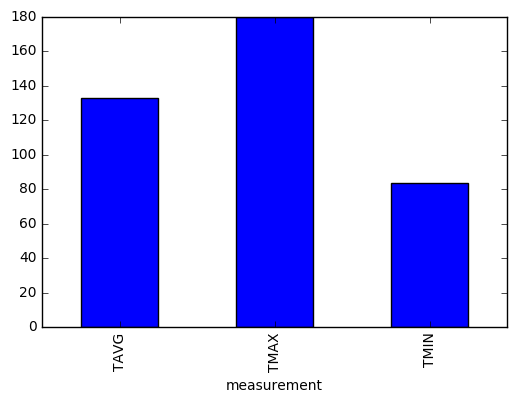

In [201]:
chicago_temps.groupby('measurement').value.mean().plot(kind='bar')

Although you can go through some rigamarole to improve the appearance, other packages have better aesthetics by default.

---

## Plotting Using Seaborn

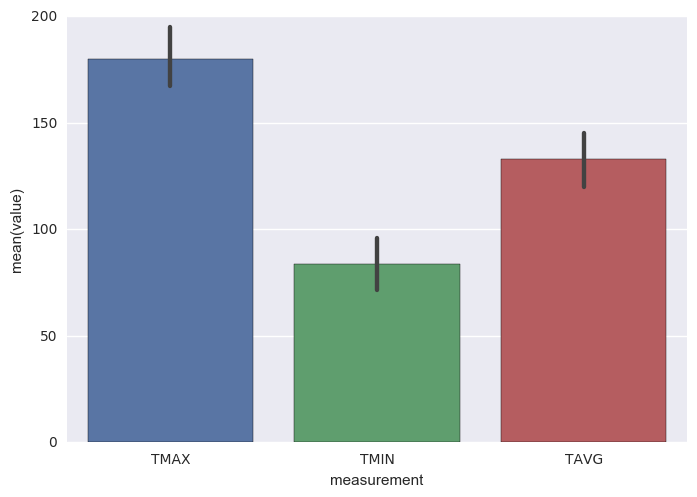

In [208]:
import seaborn as sns

#Barplot
sns.barplot(x="measurement", y="value", data=chicago_temps);

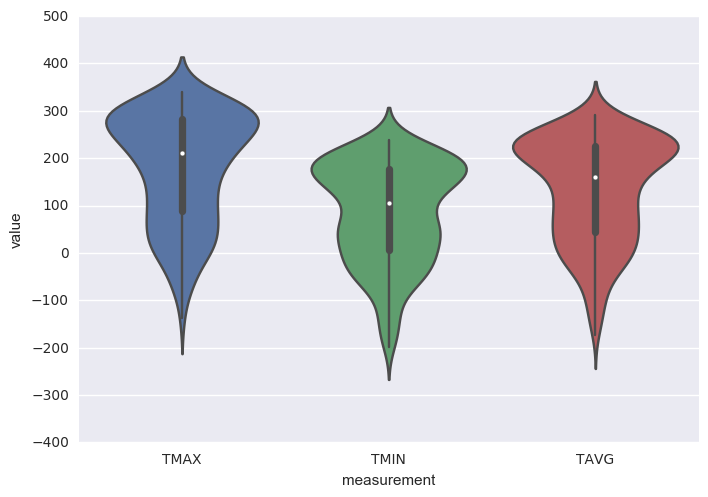

In [210]:
#Violin Plot
sns.violinplot(x="measurement", y="value", data=chicago_temps);

---

## Plotting Using ggplot (For Python)

In [63]:
#Install ggplot for Python 3 if Needed
#!pip3 install -U ggplot

### For R Users: Note that this version of ggplot includes some of the same data as ggplot2

#### [Examples Courtesy of Yhat](http://ggplot.yhathq.com/docs/scale_color_brewer.html):

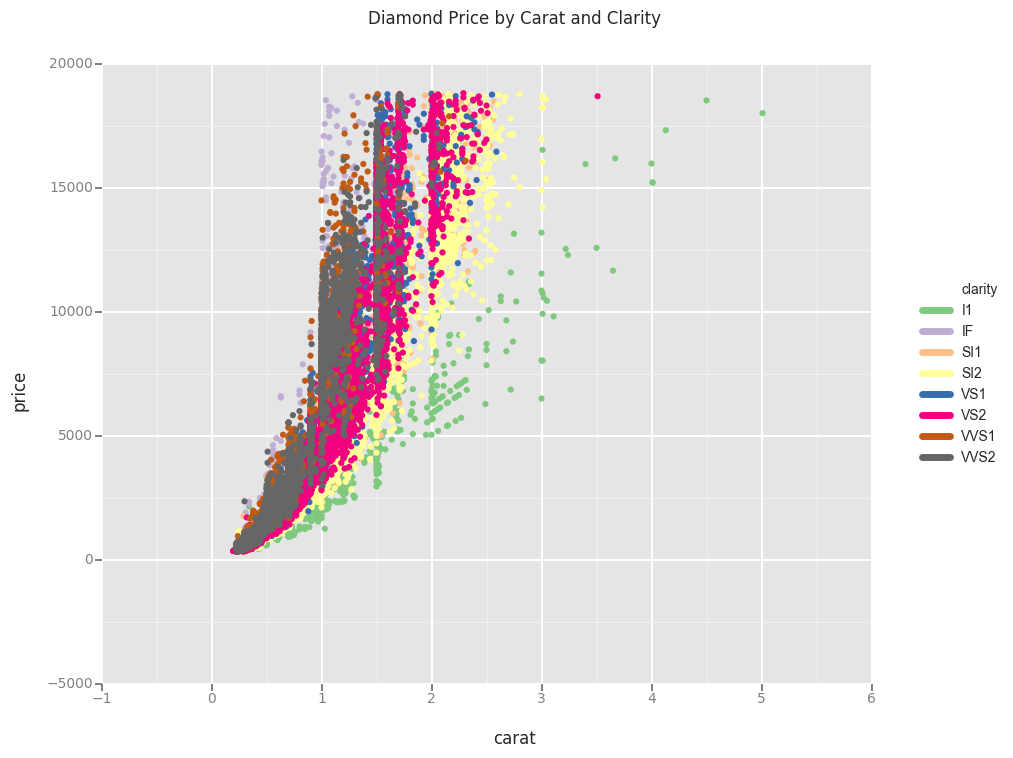

<ggplot: (-9223372036567120454)>

In [262]:
ggplot(aes(x='carat', y='price', color='clarity'), data=diamonds) +\
    geom_point() +\
    scale_color_brewer(type='qual') + \
    ggtitle("Diamond Price by Carat and Clarity")

### Using ggplot for Chicago Weather


#### Before implementing the ggplot, let's first clean up the datetime to make it more useful:

In [267]:
chicago_temps['datetime'] = pd.to_datetime(chicago_temps.date, format='%Y%m%d')
chicago_temps.index = chicago_temps.datetime
chicago_temps.dtypes
chicago_temps.head()

,station_id,date,measurement,value,datetime
datetime,,,,,
2016-01-01,USW00094846,20160101,TMAX,-5,2016-01-01
2016-01-01,USW00094846,20160101,TMIN,-71,2016-01-01
2016-01-01,USW00094846,20160101,TAVG,-48,2016-01-01
2016-01-02,USW00094846,20160102,TMAX,0,2016-01-02
2016-01-02,USW00094846,20160102,TMIN,-66,2016-01-02


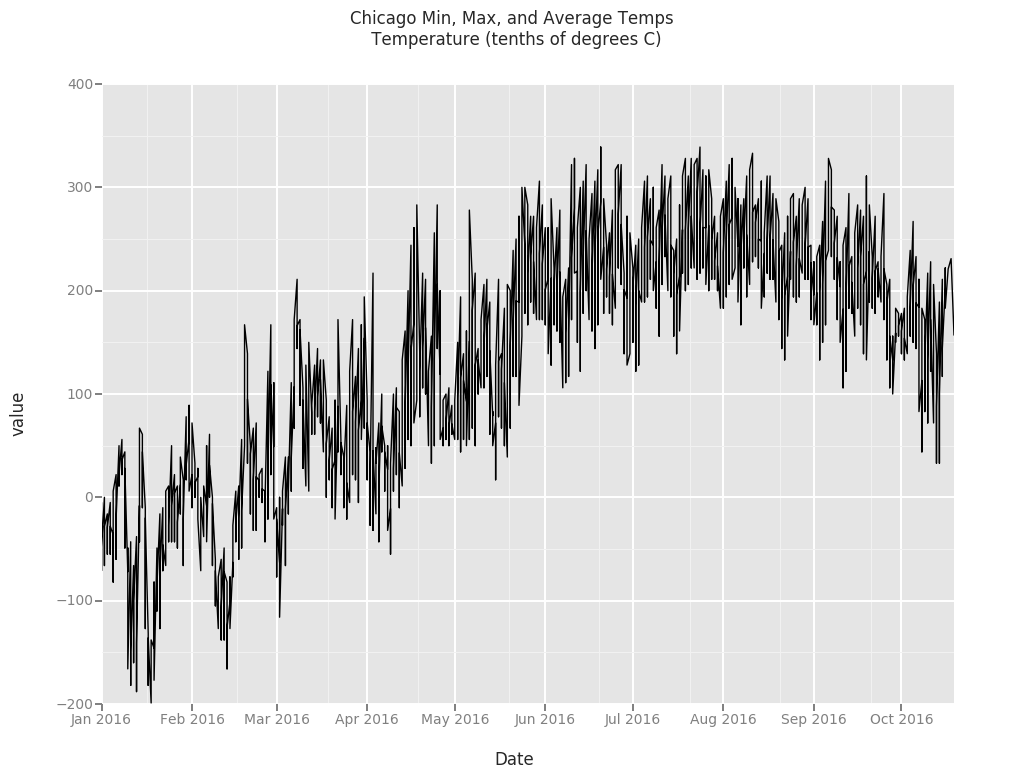

<ggplot: (-9223372036576478597)>

In [268]:
ggplot(chicago_temps, aes('datetime', y='value')) + \
    geom_line() + \
    ggtitle("Chicago Min, Max, and Average Temps \n Temperature (tenths of degrees C)") + xlab("Date") 

#### We Can Spruce This Up A Bit with Some Color and Variation by Min, Max, and Average Temperatures

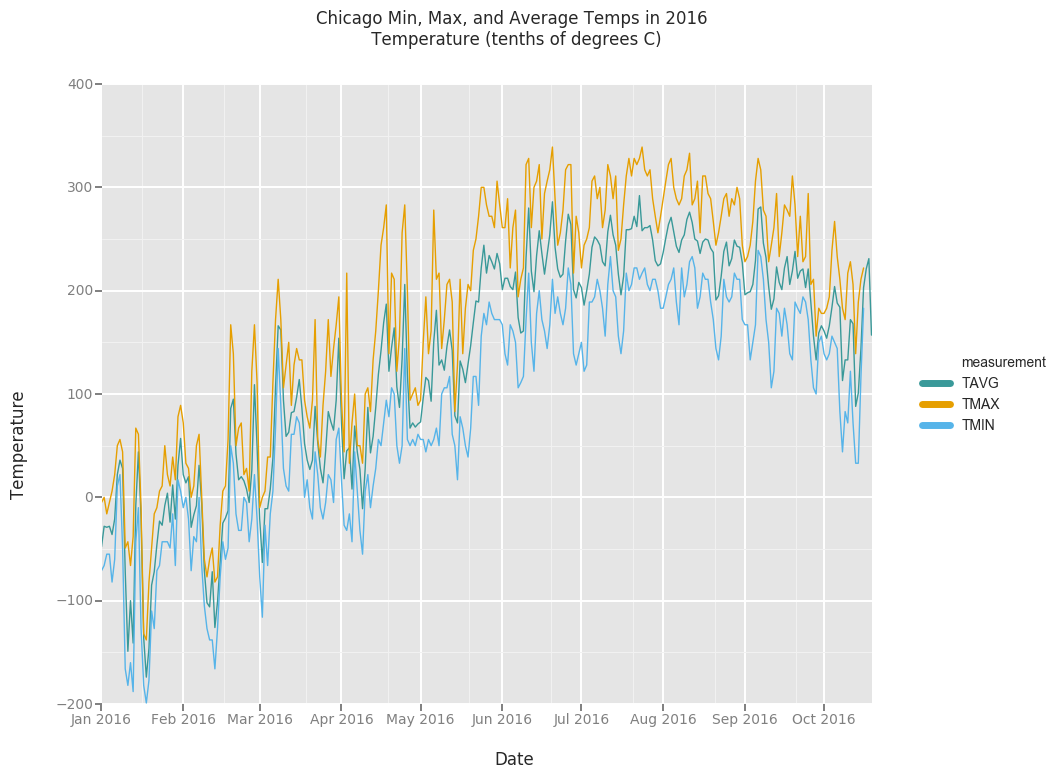

<ggplot: (-9223372036568905307)>

In [255]:
#Refined Time Series ggplot
ggplot(chicago_temps, aes(x='datetime', y='value', colour='measurement')) + \
    geom_line() + \
    ggtitle("Chicago Min, Max, and Average Temps in 2016 \n Temperature (tenths of degrees C)") + \
    xlab("Date") + ylab("Temperature") + \
    scale_color_manual(values=("#399999", "#E69F00", "#56B4E9"))

---

*Note, that parts of this notebook have been adapted from [Data Science for the Social Good's](https://dssg.uchicago.edu) "Hitchhiker's Guide" [Tech Tutorials](https://github.com/dssg/hitchhikers-guide/blob/master/tech-tutorials/data-exploration-in-python/worksheets/Getting%20Started%20Working%20with%20Data%20In%20Python.ipynb). This notebook includes modifications to update the notebook to Python 3, adjust for errors in temperature scale, data documentation, and new plotting packages including Seaborn and ggplot (for Python).*


---